# Introduction

This notebook contains code to load performance and loss landscape metrics from model zoos and visualize the phases. Further below, we also provide an example to explore and load individual models.

In [1]:
from pathlib import Path
import json
import numpy as np
import pandas as pd

## Define functions to read metrics from model zoos

In [2]:
def read_json_line(file_path, line_number):
    """
    Read a specific line from a JSON file and return its content.

    Args:
        file_path (str): Path to the JSON file.
        line_number (int): The line number to read (0-based index).

    Returns:
        dict: The parsed JSON object from the specified line.
    """
    with open(file_path, 'r') as f:
        for current_line_number, line in enumerate(f):
            if current_line_number == line_number:
                return json.loads(line)
    raise IndexError(f"Line {line_number} not found in file {file_path}.")

def compile_configs(root_dir, line_number):
    """
    Compile configurations from specific lines of result.json files in the directory structure.

    Args:
        root_dir (str): The root directory containing the configuration directories.
        line_number (int): The line number to read from each result.json file.

    Returns:
        pd.DataFrame: DataFrame of configurations.
    """
    # Create a Path object for the root directory
    root_path = Path(root_dir)

    # List to hold all the configurations and their paths
    data = []

    # Walk through the directory structure
    path_list = [pdx for pdx in root_path.iterdir() if pdx.is_dir()]
    for pdx in path_list:
        json_file = pdx.joinpath('result.json')    
        # Load the specific line from the JSON file
        try:
            result = read_json_line(json_file, line_number)
        except FileNotFoundError:
            print(f"File not found: {json_file}")
            continue
        except IndexError as e:
            print(e)
            continue
        
        # Unroll the 'config' dictionary into the main dictionary
        config = result.pop('config', {})
        result.update(config)
        
        # Append the configuration and the path to the data list
        result["file_path"] = str(json_file).replace("result.json", "")
        data.append(result)

    # Convert the list of dictionaries to a pandas DataFrame
    df = pd.DataFrame(data)

    return df

## Read data from model zoo

Please download the sample model zoos before executing the cells below. To download and extract the data, run `download_Data.sh` in the main directory. This will download and extract two sample model zoos.

In [21]:
# set path to model zoo

# option 1: cifar10 - ResNet 18
path_zoo = Path('./data/cifar_10-ResNet18_subset')
epoch = 115 
# epoch=150

# option 2: cifar100 - ResNet 50
# path_zoo = Path('./data/cifar_100-ResNet50_subset')
# epoch = 125
# epoch = 150


In [22]:
# load data from zoo to a pd.DataFrame
data_df = compile_configs(root_dir=path_zoo, line_number=epoch)

# explore dataframe
data_df

,train_loss,train_acc,test_loss,test_acc,done,training_iteration,trial_id,date,timestamp,time_this_iter_s,...,training::batchsize,training::epochs_train,training::output_epoch,training::data_path,cuda,dataset::dump,resources,scheduler::steps_per_epoch,file_path,training::accumulate_gradients_steps
0,0.000947,1.00000,0.960257,0.7205,False,115,0ada0_00013,2024-05-21_15-48-53,1716306533,3.029197,...,1024,150,1,/ds2/model_zoos/taxonomy/cifar_10/,True,/ds2/model_zoos/taxonomy/cifar_10/dataset_prep...,"{'cpu': 16, 'gpu': 1}",49,/ds2/model_zoos/taxonomy/cifar_10/zoos/Cifar-1...,NaN
1,0.223001,0.92432,0.541610,0.8286,False,115,0ada0_00125,2024-05-23_04-19-24,1716437964,14.630229,...,32,150,1,/ds2/model_zoos/taxonomy/cifar_10/,True,/ds2/model_zoos/taxonomy/cifar_10/dataset_prep...,"{'cpu': 16, 'gpu': 1}",1563,/ds2/model_zoos/taxonomy/cifar_10/zoos/Cifar-1...,NaN
2,0.028167,0.99126,0.604684,0.8393,False,115,0ada0_00077,2024-05-22_07-06-47,1716361607,4.577580,...,128,150,1,/ds2/model_zoos/taxonomy/cifar_10/,True,/ds2/model_zoos/taxonomy/cifar_10/dataset_prep...,"{'cpu': 16, 'gpu': 1}",391,/ds2/model_zoos/taxonomy/cifar_10/zoos/Cifar-1...,NaN
3,0.516950,0.81956,0.757149,0.7465,False,115,0ada0_00113,2024-05-22_21-45-00,1716414300,6.812324,...,64,150,1,/ds2/model_zoos/taxonomy/cifar_10/,True,/ds2/model_zoos/taxonomy/cifar_10/dataset_prep...,"{'cpu': 16, 'gpu': 1}",782,/ds2/model_zoos/taxonomy/cifar_10/zoos/Cifar-1...,NaN
4,0.001337,1.00000,0.991217,0.7117,False,115,0ada0_00004,2024-05-21_13-42-21,1716298941,2.516001,...,1024,150,1,/ds2/model_zoos/taxonomy/cifar_10/,True,/ds2/model_zoos/taxonomy/cifar_10/dataset_prep...,"{'cpu': 16, 'gpu': 1}",49,/ds2/model_zoos/taxonomy/cifar_10/zoos/Cifar-1...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.131547,0.95456,0.813123,0.7878,False,115,0ada0_00082,2024-05-22_09-01-51,1716368511,3.802076,...,128,150,1,/ds2/model_zoos/taxonomy/cifar_10/,True,/ds2/model_zoos/taxonomy/cifar_10/dataset_prep...,"{'cpu': 16, 'gpu': 1}",391,/ds2/model_zoos/taxonomy/cifar_10/zoos/Cifar-1...,NaN
188,0.021935,0.99366,0.580542,0.8456,False,115,0ada0_00085,2024-05-22_09-37-07,1716370627,4.629805,...,128,150,1,/ds2/model_zoos/taxonomy/cifar_10/,True,/ds2/model_zoos/taxonomy/cifar_10/dataset_prep...,"{'cpu': 16, 'gpu': 1}",391,/ds2/model_zoos/taxonomy/cifar_10/zoos/Cifar-1...,NaN
189,0.386480,0.86192,0.825643,0.7340,False,115,0ada0_00089,2024-05-22_11-21-38,1716376898,3.833921,...,128,150,1,/ds2/model_zoos/taxonomy/cifar_10/,True,/ds2/model_zoos/taxonomy/cifar_10/dataset_prep...,"{'cpu': 16, 'gpu': 1}",391,/ds2/model_zoos/taxonomy/cifar_10/zoos/Cifar-1...,NaN
190,0.697233,0.76298,0.686888,0.7677,False,115,b9e4e_00022,2024-06-06_00-46-21,1717634781,58.625808,...,8,150,1,/ds2/model_zoos/taxonomy/cifar_10/,True,/ds2/model_zoos/taxonomy/cifar_10/dataset_prep...,"{'cpu': 32, 'gpu': 1}",6250,/ds2/model_zoos/taxonomy/cifar_10/zoos/Cifar-1...,1.0


In [23]:
# The dataframe contains multiple performance and loss landscape metrics for every model in teh zoo
data_df.keys()

Index(['train_loss', 'train_acc', 'test_loss', 'test_acc', 'done',
       'training_iteration', 'trial_id', 'date', 'timestamp',
       'time_this_iter_s', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'iterations_since_restore',
       'representation_similarity', 'representation_similarity_pairs',
       'log_hessian_top_ev', 'log_hessian_trace', 'curve_mc_train_error',
       'wiseft_acc_test', 'wiseft_acc_test_delta', 'curve_mc_test_error',
       'log_hessian_trace_train', 'log_hessian_top_ev_val',
       'gitrebasin_acc_test_delta', 'gitrebasin_acc_test', 'model::type',
       'model::channels_in', 'model::o_dim', 'model::nlin', 'model::dropout',
       'model::init_type', 'model::use_bias', 'model::width',
       'optim::optimizer', 'optim::lr', 'optim::wd', 'optim::momentum',
       'optim::scheduler', 'training::loss', 'training::dataloader',
       'trainloader::workers', 'testloader::workers', 'seed',
       'training::batchsize', 'training::epoc

## Visualize phases

The cell below re-creates the figures in the submission from the model zoo samples.

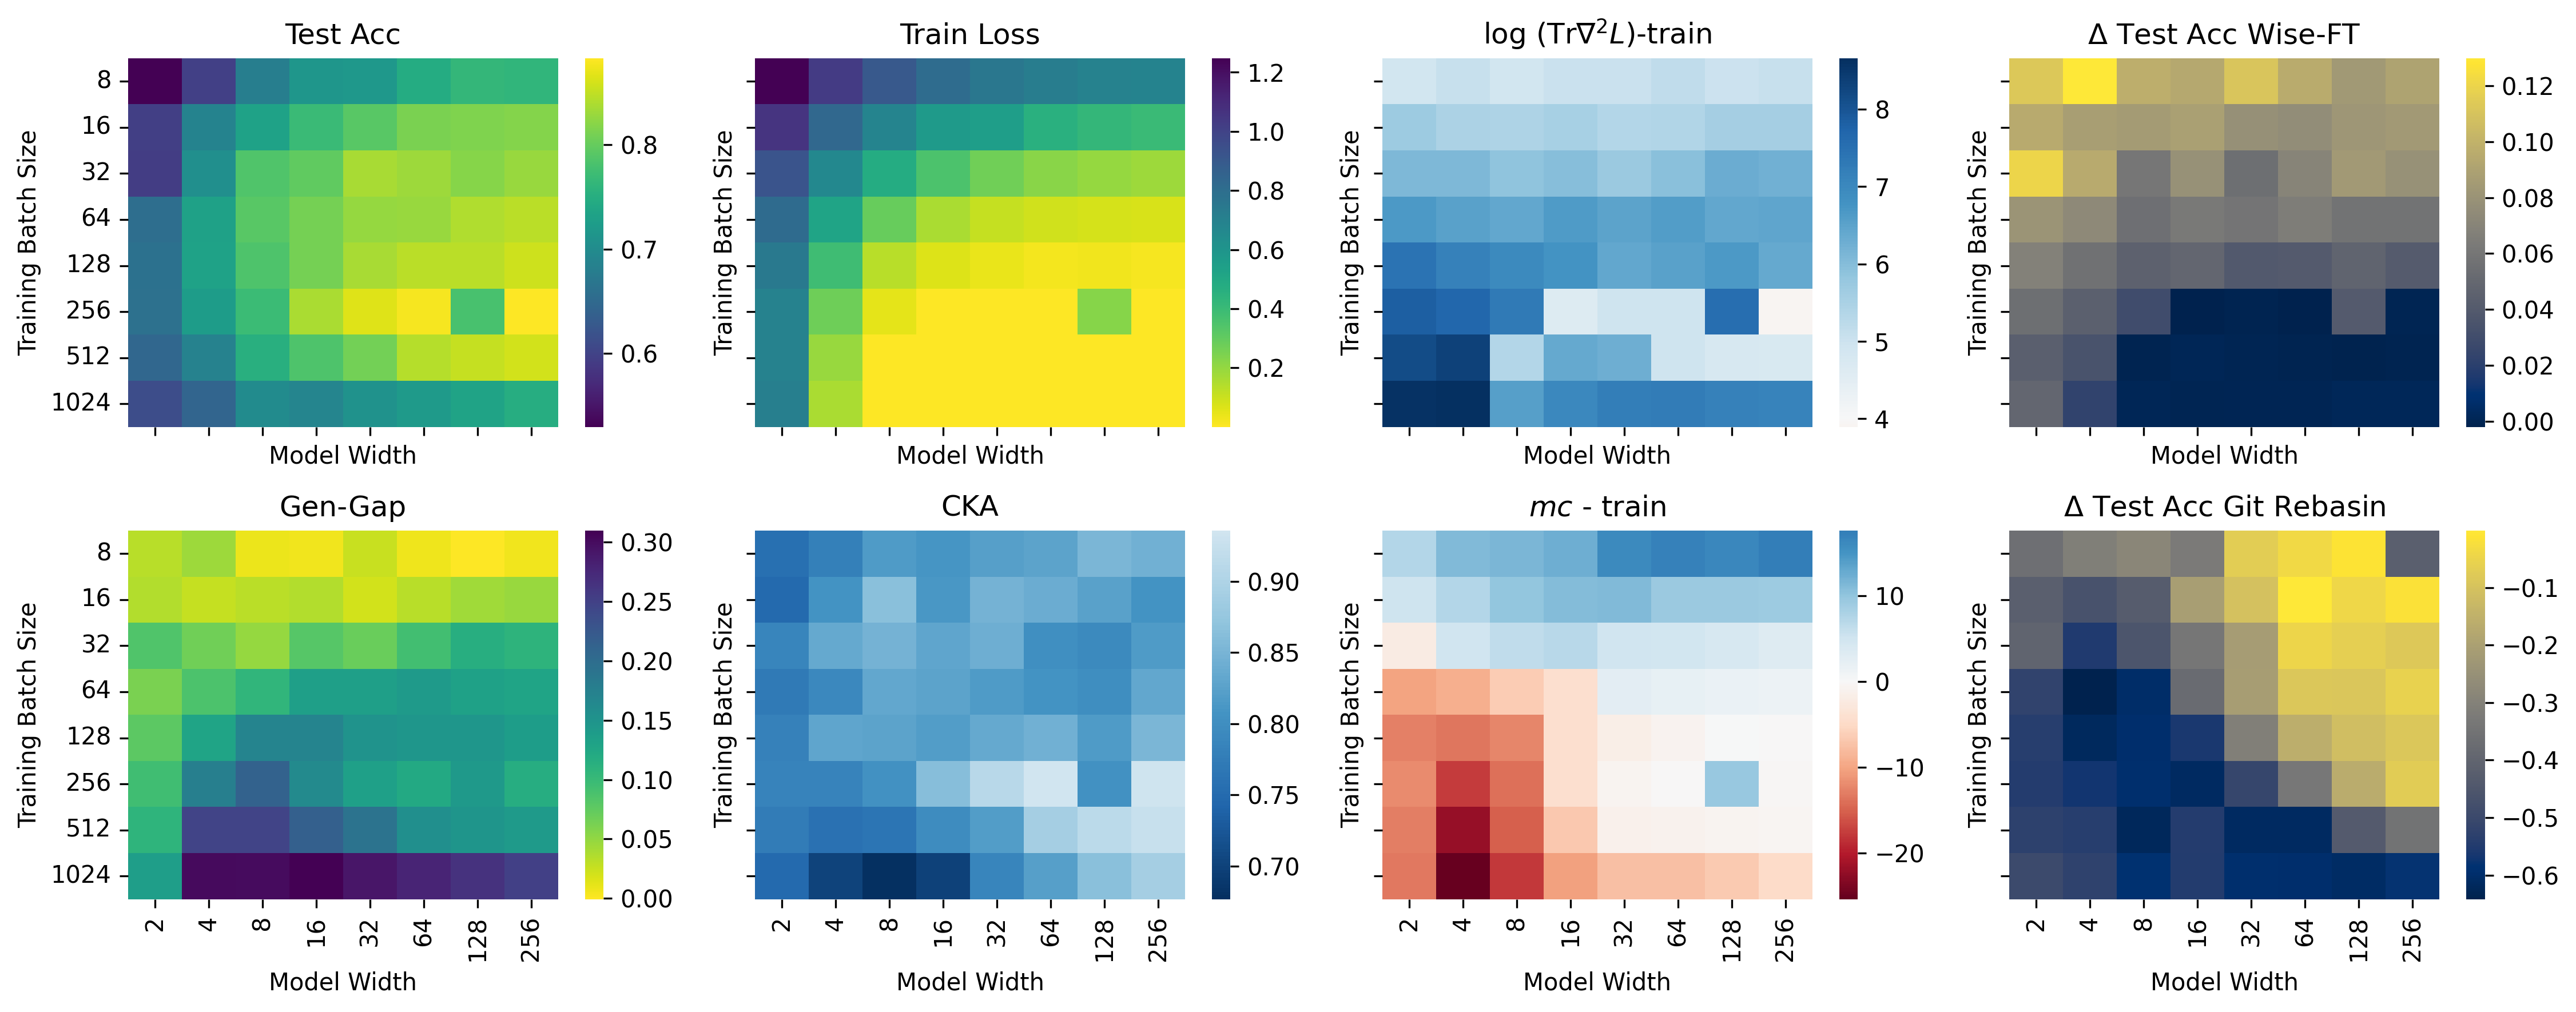

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


fig_list = [["train_loss","test_acc"],["ggap","representation_similarity"],['curve_mc_train_error','curve_mc_test_error'],
            [ "log_hessian_trace_train","log_hessian_top_ev_val"],['wiseft_acc_test_delta','gitrebasin_acc_test_delta']]
fig_list = [["test_acc","ggap"],["train_loss","representation_similarity"],["log_hessian_trace_train",'curve_mc_train_error'],
            ['wiseft_acc_test_delta','gitrebasin_acc_test_delta']]

# centered = ['curve_mc_train_error', 'curve_mc_test_error']
centered = {
    'curve_mc_train_error':[0, False], 
    'curve_mc_test_error':[0, False],
    'representation_similarity':[1.0,True],
    'log_hessian_trace_train':[4, False],
    'log_hessian_trace_val':[5, False],
    'log_hessian_top_ev_train':[1, False],
    'log_hessian_top_ev_val':[1, False],
   }
perf_metrics = {
    'test_acc':False, 
    'ggap':True, 
    'train_loss':True, 
}
averaging_metrics = {
    'wiseft_acc_test_delta':False, 
    'gitrebasin_acc_test_delta':False, 
}
num_cols = len(fig_list)
num_rows = len(fig_list[0])

title_dict = {
    "train_loss": "Train Loss",
    "test_acc": "Test Acc",
    "ggap": "Gen-Gap",
    "curve_mc_train_error": r"$mc$ - train",
    "curve_mc_test_error": r"$mc$ - val",
    "log_hessian_top_ev": r"log$(\lambda_{max})$",
    "log_hessian_trace": r"log $($Tr$\nabla^2 L)$",
    "log_hessian_top_ev_train": r"log$(\lambda_{max})$-train",
    "log_hessian_trace_train": r"log $($Tr$\nabla^2 L)$-train",
    "log_hessian_top_ev_val": r"log$(\lambda_{max})$-val",
    "log_hessian_trace_val": r"log $($Tr$\nabla^2 L)$-val",
    "representation_similarity": r"CKA",
    "wiseft_acc_test_delta": r"$\Delta$ Test Acc Wise-FT",
    "gitrebasin_acc_test_delta": r"$\Delta$ Test Acc Git Rebasin",
}

fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows,figsize=(3.8*num_cols,3*num_rows),dpi=300,sharex=True,sharey=True)

df_merged = data_df
df_merged['ggap'] = df_merged['train_acc']-df_merged['test_acc']

for idx,fig_keys in enumerate(fig_list):
    for jdx,fig_key in enumerate(fig_keys):
        df_fig = df_merged.pivot_table(index='training::batchsize', columns='model::width', values=fig_key)
    
        # Create the heatmap
        adx = ax[jdx,idx]
    
        if fig_key in centered:
            center, inverted = centered[fig_key]
            # cmap = plt.cm.get_cmap('RdBu')
            cmap = plt.colormaps.get_cmap('RdBu')
            if inverted:
                # Invert the colormap
                cmap = cmap.reversed()
            sns.heatmap(df_fig, annot=False, cmap=cmap, center=center, cbar=True,ax=adx)
        elif fig_key in perf_metrics:
            inverted = perf_metrics[fig_key]
            cmap = plt.colormaps.get_cmap('viridis')
            if inverted:
                # Invert the colormap
                cmap = cmap.reversed()
            sns.heatmap(df_fig, annot=False, cmap=cmap, cbar=True,ax=adx)
        elif fig_key in averaging_metrics:
            inverted = averaging_metrics[fig_key]
            # cmap = sns.light_palette(color='green')
            # cmap = plt.colormaps.get_cmap('magma')
            cmap = plt.colormaps.get_cmap('cividis')
            if inverted:
                # Invert the colormap
                cmap = cmap.reversed()
            sns.heatmap(df_fig, annot=False, cmap=cmap, cbar=True,ax=adx)
        else:
            cmap = plt.colormaps.get_cmap('viridis')
            sns.heatmap(df_fig, annot=False, cmap=cmap, cbar=True,ax=adx)
        adx.set_title(f'{title_dict[fig_key]}')
        adx.set_xlabel('Model Width')
        adx.set_ylabel('Training Batch Size')

fig.tight_layout()
plt.show()


# Instantiate models and load checkpoints

Next, we'll inspect a single model, load it's config and checkpoint, and re-instantiate it.

In [26]:
# set zoo path
path_zoo = Path('./data/cifar_100-ResNet50_subset')

# pick one model out of the zoo
model_path = path_zoo.joinpath('NN_tune_trainable_bf0b6_00005_5_model_width=64,optim_lr=0.1000,optim_wd=0.0005,seed=0,training_batchsize=1024_2024-05-22_11-30-52')

# there is a config json file named `params.json`
config_path = model_path.joinpath('params.json')

# set path for checkpoint at epoch 100
checkpoint_path = model_path.joinpath('checkpoint_000100','checkpoints')


In [27]:
# we need torch and some local code to instantiate the model

import torch
import sys
sys.path.append('./src/')

from ptmz.models.def_net_width import NNmodule_width

In [28]:
# load model config
config = json.load(config_path.open('r'))

config

{'cuda': True,
 'dataset::dump': '/ds2/model_zoos/taxonomy/cifar_100/dataset_preprocessed.pt',
 'model::channels_in': 3,
 'model::dropout': 0.0,
 'model::init_type': 'kaiming_uniform',
 'model::nlin': 'relu',
 'model::o_dim': 100,
 'model::type': 'Resnet50_width',
 'model::use_bias': False,
 'model::width': 64,
 'optim::lr': 0.1,
 'optim::momentum': 0.9,
 'optim::optimizer': 'sgd',
 'optim::scheduler': 'OneCycleLR',
 'optim::wd': 0.0005,
 'resources': {'cpu': 12, 'gpu': 1},
 'seed': 0,
 'testloader::workers': 4,
 'training::batchsize': 1024,
 'training::data_path': '/ds2/model_zoos/taxonomy/cifar_100/',
 'training::dataloader': 'normal',
 'training::epochs_train': 150,
 'training::loss': 'crossentropy',
 'training::output_epoch': 1,
 'trainloader::workers': 6}

In [29]:
# instantiate the trainer wrapper
config["device"] = torch.device('cpu')
config["cuda"] = False
config["scheduler::steps_per_epoch"] = 123
trainer = NNmodule_width(config)

In [30]:
# load checkpoint 
ckpt = torch.load(checkpoint_path,map_location='cpu')

In [33]:
# rename checkpoint keys
def clean_state_dict(state_dict):
    from collections import OrderedDict

    new_state_dict = OrderedDict()
    for key, params in state_dict.items():
        name = key.replace("module.", "")  # remove 'module.'
        new_state_dict[name] = params
    return new_state_dict

ckpt = clean_state_dict(ckpt)

# load checkpoint
trainer.model.load_state_dict(ckpt)

<All keys matched successfully>